In [1]:
import pandas as pd

# Baca dataset
df = pd.read_csv("../Dataset/train_labels.csv")

# Tampilkan 5 data pertama
print(df.head())

# Informasi umum dataset
print("\n📌 Info Dataset:")
print(df.info())

# Statistik deskriptif
print("\n📌 Statistik Deskriptif:")
print(df.describe(include='all'))


               article_id                      dataset_id     type
0    10.1002_2017jc013030  https://doi.org/10.17882/49388  Primary
1  10.1002_anie.201916483                         Missing  Missing
2  10.1002_anie.202005531                         Missing  Missing
3  10.1002_anie.202007717                         Missing  Missing
4  10.1002_chem.201902131                         Missing  Missing

📌 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  1028 non-null   object
 1   dataset_id  1028 non-null   object
 2   type        1028 non-null   object
dtypes: object(3)
memory usage: 24.2+ KB
None

📌 Statistik Deskriptif:
               article_id dataset_id       type
count                1028       1028       1028
unique                523        720          3
top     10.3390_v11060565    Missing  Secondary
freq        

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22324\369148537.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, order=type_counts.index, palette='Set2')


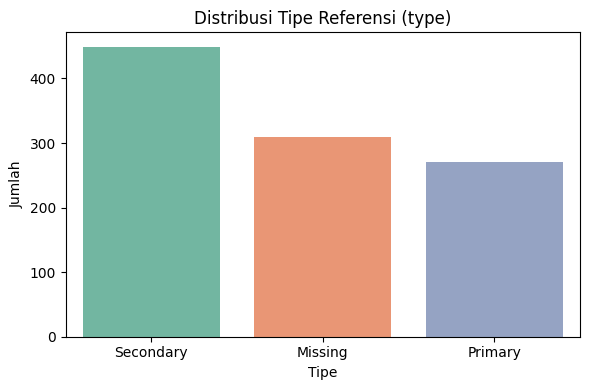


📊 Jumlah total data: 1028

📊 Distribusi kolom 'type':
type
Secondary    449
Missing      309
Primary      270
Name: count, dtype: int64

🚫 Jumlah nilai 'Missing' per kolom:
article_id      0
dataset_id    309
type          309
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah semua kolom menjadi lowercase untuk konsistensi
df.columns = df.columns.str.lower()


# Bar chart distribusi 'type'
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, order=type_counts.index, palette='Set2')
plt.title('Distribusi Tipe Referensi (type)')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# Hitung jumlah total baris
total_rows = len(df)
print(f"\n📊 Jumlah total data: {total_rows}")

# Distribusi kolom 'type'
type_counts = df['type'].value_counts()
print("\n📊 Distribusi kolom 'type':")
print(type_counts)

# Cek nilai 'Missing' dalam dataset_id dan type
missing_counts = (df == 'Missing').sum()
print("\n🚫 Jumlah nilai 'Missing' per kolom:")
print(missing_counts)


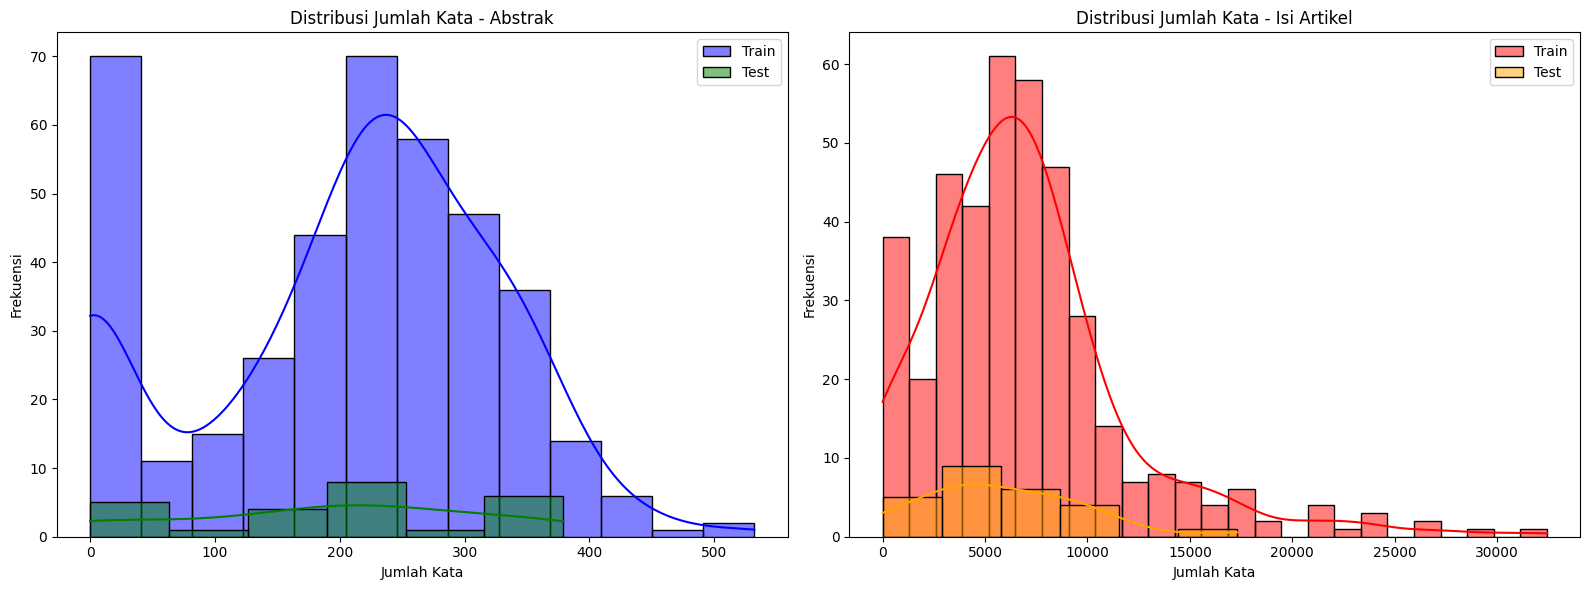


📊 Statistik Abstrak (Train/Test)
Train  - Total: 400, Mean: 204.66, Median: 225, Min: 0, Max: 532
Test   - Total: 25, Mean: 189.36, Median: 217, Min: 0, Max: 379

📊 Statistik Isi Artikel (Train/Test)
Train  - Total: 400, Mean: 6947.71, Median: 6374, Min: 0, Max: 32422
Test   - Total: 25, Mean: 5864.4, Median: 5149, Min: 0, Max: 17306


In [5]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
import seaborn as sns
from lxml import etree
import numpy as np

# Fungsi ekstraksi abstrak dan isi artikel dari XML
def extract_abstract_and_fulltext(xml_path):
    try:
        with open(xml_path, "rb") as f:
            tree = etree.parse(f)
            abstract_nodes = tree.xpath("//abstract//text()")
            fulltext_nodes = tree.xpath("//body//text()")

            abstract = " ".join(abstract_nodes).strip()
            full_text = " ".join(fulltext_nodes).strip()

            return abstract, full_text
    except Exception as e:
        print(f"❌ Gagal memproses {xml_path.name}: {e}")
        return "", ""

# Path ke dataset
train_xml_dir = Path("../Dataset/train/XML")
test_xml_dir = Path("../Dataset/test/XML")

# Dictionary untuk menyimpan panjang kata
word_counts = {
    "train_abstract": [],
    "train_fulltext": [],
    "test_abstract": [],
    "test_fulltext": [],
}

# Ambil data dari train/XML
for xml_file in sorted(train_xml_dir.glob("*.xml")):
    abstract, full_text = extract_abstract_and_fulltext(xml_file)
    word_counts["train_abstract"].append(len(abstract.split()))
    word_counts["train_fulltext"].append(len(full_text.split()))

# Ambil data dari test/XML
for xml_file in sorted(test_xml_dir.glob("*.xml")):
    abstract, full_text = extract_abstract_and_fulltext(xml_file)
    word_counts["test_abstract"].append(len(abstract.split()))
    word_counts["test_fulltext"].append(len(full_text.split()))

# Fungsi cetak statistik
def get_stats(data):
    return {
        "Total": len(data),
        "Mean": round(np.mean(data), 2),
        "Median": int(np.median(data)),
        "Min": int(np.min(data)),
        "Max": int(np.max(data)),
    }

# Ambil statistik
abstract_train_stats = get_stats(word_counts["train_abstract"])
abstract_test_stats = get_stats(word_counts["test_abstract"])
fulltext_train_stats = get_stats(word_counts["train_fulltext"])
fulltext_test_stats = get_stats(word_counts["test_fulltext"])

# --- Visualisasi side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1 - Abstrak
sns.histplot(word_counts["train_abstract"], color="blue", label="Train", kde=True, ax=axes[0])
sns.histplot(word_counts["test_abstract"], color="green", label="Test", kde=True, ax=axes[0])
axes[0].set_title("Distribusi Jumlah Kata - Abstrak")
axes[0].set_xlabel("Jumlah Kata")
axes[0].set_ylabel("Frekuensi")
axes[0].legend()

# Subplot 2 - Full Text
sns.histplot(word_counts["train_fulltext"], color="red", label="Train", kde=True, ax=axes[1])
sns.histplot(word_counts["test_fulltext"], color="orange", label="Test", kde=True, ax=axes[1])
axes[1].set_title("Distribusi Jumlah Kata - Isi Artikel")
axes[1].set_xlabel("Jumlah Kata")
axes[1].set_ylabel("Frekuensi")
axes[1].legend()

plt.tight_layout()
plt.show()

# Tampilkan statistik setelah visualisasi
print("\n📊 Statistik Abstrak (Train/Test)")
print(f"Train  - Total: {abstract_train_stats['Total']}, Mean: {abstract_train_stats['Mean']}, Median: {abstract_train_stats['Median']}, Min: {abstract_train_stats['Min']}, Max: {abstract_train_stats['Max']}")
print(f"Test   - Total: {abstract_test_stats['Total']}, Mean: {abstract_test_stats['Mean']}, Median: {abstract_test_stats['Median']}, Min: {abstract_test_stats['Min']}, Max: {abstract_test_stats['Max']}")

print("\n📊 Statistik Isi Artikel (Train/Test)")
print(f"Train  - Total: {fulltext_train_stats['Total']}, Mean: {fulltext_train_stats['Mean']}, Median: {fulltext_train_stats['Median']}, Min: {fulltext_train_stats['Min']}, Max: {fulltext_train_stats['Max']}")
print(f"Test   - Total: {fulltext_test_stats['Total']}, Mean: {fulltext_test_stats['Mean']}, Median: {fulltext_test_stats['Median']}, Min: {fulltext_test_stats['Min']}, Max: {fulltext_test_stats['Max']}")
